# AzureML Studio : Designer

In this notebook, we will use the AzureML Studio's Designer to design our data processing pipeline.

The idea is to take advantage of the drag and drop tool


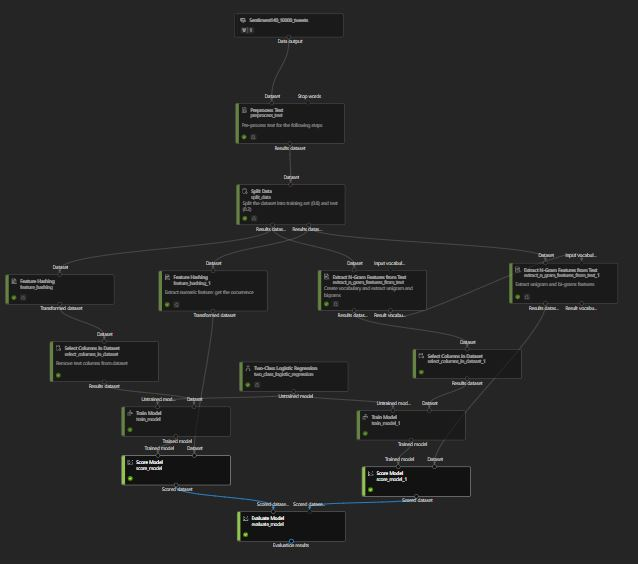

We will compare this pre-trained local model to the baseline model from 1_baseline.ipynb.

### Text preprocessing
Before training our models, the data is prepared as follow :

* data is sampled to 2% of the original data (stratified according to the target variable)
* text is processed :
    - expand verb contractions
    - remove stop words
    - use lemmatization
    - detect sentences by adding a sentence terminator "|||" that can be used by the n-gram features extractor module
    - normalize case to lowercase
    - remove numbers
    - remove non-alphanumeric special characters and replace them with "|" character
    - remove duplicate characters
    - remove email addresses
    - remove URLs
    - normalize backslashes to slashes
    - split tokens on special characters

### Text vectorization
We need to represent the text as a vector of numbers.

Feature Hashing
In this version, we will use the Feature Hashing module to extract features from the text, with the following parameters :

* Hashing bitsize : 10 => 2^10 = 1024 features
* N-grams : 2 => tokens are couple of words

### N-Gram Features
In this version, we will use the Extract N-Gram Features from Text module to extract features from the text, with the following parameters :

Hashing bitsize : 10 => 2^10 = 1024 features
* N-grams : 2 => tokens are couple of words
* Weighting function : TF-IDF Weight => Represents well the relative importance of a term in a specific document, versus the importance of a term in the whole corpus.
* Minimum word length : 25
* Minimum n-gram document absolute frequency : 5 => avoid rare words
* Maximum n-gram document ratio : 1 => do not exclude very frequent tokens
* Normalize n-gram feature vectors : True => normalize the vectors to unit length

This creates a vocabulary that is specific to our training data and that will be used for testing our model.

### Model training

We train a Two-Class Logistic Regression model with the following parameters :

* Optimization tolerance : 1e-7
* L2 regularization weight : 1

### Results
The test dataset goes through the same text pre-processing and vectorization steps as the training dataset, before being used to test the model.

#### Model Feature Hashing

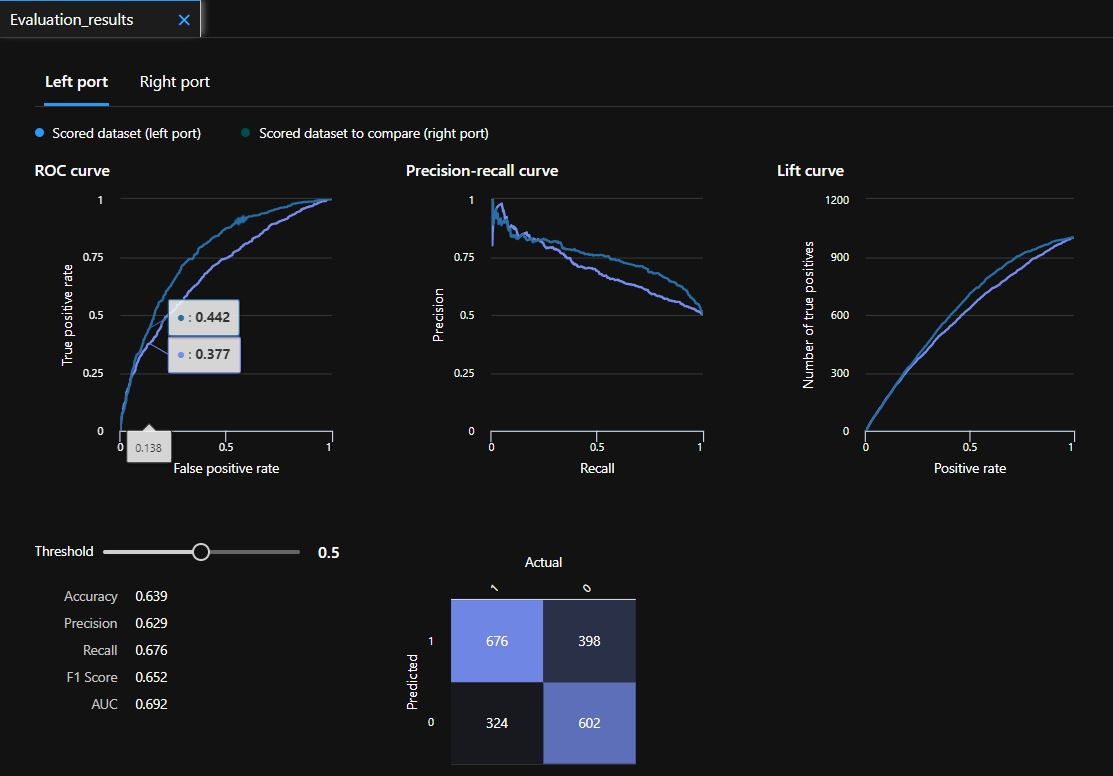

#### Model N-Gram Features

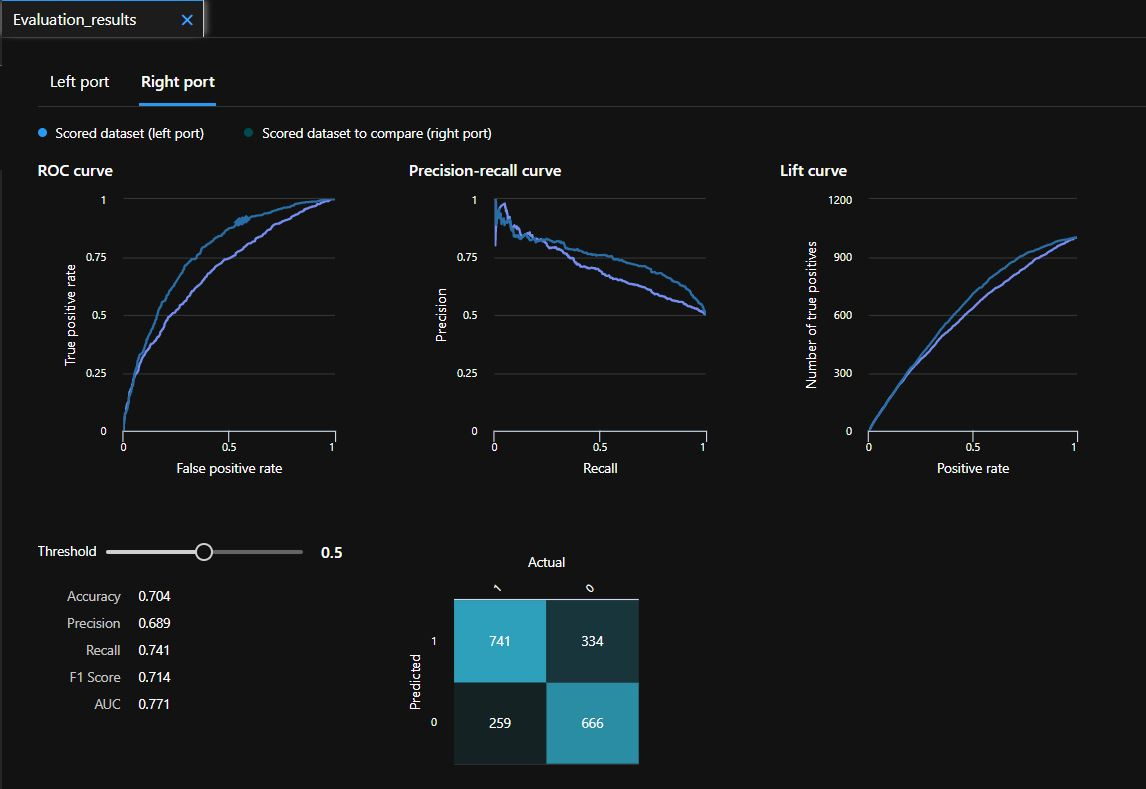

We can see that the N-Gram Features model performs better than the Feature Hashing model.

The performances on the dataset are similar to our baseline model :

* Average Precision = 0.69 (baseline = 0.64 , +7.8%)
* ROC AUC = 0.771 (baseline = 0.65 , +18.6%)

Unlike our baseline model, this model is quite balanced, just slightly biased towards the POSITIVE class. 

#### Metrics for classification models
The following metrics are reported when evaluating binary classification models.

* Accuracy measures the goodness of a classification model as the proportion of true results to total cases.

* Precision is the proportion of true results over all positive results. Precision = TP/(TP+FP)

* Recall is the fraction of the total amount of relevant instances that were actually retrieved. Recall = TP/(TP+FN)

* F1 score is computed as the weighted average of precision and recall between 0 and 1, where the ideal F1 score value is 1.

* AUC measures the area under the curve plotted with true positives on the y axis and false positives on the x axis. This metric is useful because it provides a single number that lets you compare models of different types. AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.